<h1><center>Energy-minimizing Bèzier Curves</center></h1>
<h6><center>Justin Tervala</center></h6>

This notebook provides various functions used to construct and investigate energy-minimizing Bèzier curves.

First, we need to import NumPy and the binomial coefficient equation from SciPy

In [ ]:
import numpy as np
from scipy.special import binom

<h2><center>Computing the Matrix</center></h2>
We need a function to compute

\begin{equation*}
\sum_{j \in D}\left(\sum_{\substack{
k=j-m \\
0\leq k\leq n-m
}}^{j}\delta_{m}^{|j-k|}N_{i,k}^{n,m}\right)\mathbf{P}_{j}
\end{equation*}

First, the function to calculate 


\begin{equation*}
N_{i,j}^{n,m} = {n-m \choose j}\sum_{\substack{
\mathscr{l}=0 \\
i-\mathscr{l}\geq 0 
}}^{m}(-1)^{m-\mathscr{l}}{m \choose \mathscr{l}}\frac{{ n-m \choose i-\mathscr{l}}}{{2n-2m \choose i+j-\mathscr{l}}}
\end{equation*}

In the function below, we changed the variable $\mathscr{l}$ to $k$ because `l` looks too much like `1`. We also asserted that 

\begin{equation*}
0 \leq i-k \leq n-m
\end{equation*}

so that the demoninator is never 0 and the binomial coefficients are defined.

In [ ]:
def calc_n(i, j, n, m):
    sum_ = 0
    for k in range(m + 1):
        if 0 <= i - k <= n-m:
            sum_ += ((-1) ** (m-k) *
                     binom(m, k) *
                     binom(n-m, i-k) /
                     binom(2 * (n-m), i+j-k))
    return binom(n-m, j) * sum_

In [ ]:
n = 4
m = 1
print('-'*18)
for i in range(n):
    for j in range(n):
        print('N({0},{1},{2},{3}) = {4}'.format(i, j, n, m, round(calc_n(i, j, n, m), 2)))
    print('-'*18)

Next a function to compute the inner summation

\begin{equation*}
\sum_{\substack{
k=j-m \\
0\leq k\leq n-m
}}^{j}\delta_{m}^{|j-k|}N_{i,k}^{n,m}
\end{equation*}

This is done with Python's builtin `sum` function sums the results of a generator. The bounds of $k$ are given by 

\begin{equation*}
\max{(0,  j-m)} \leq k \leq \min{(j,  n-m-1)}
\end{equation*}



In [6]:
def delta(k, m):
    return (-1)**(m-k)*binom(m, k)


def inner_sum(i, j, n, m):
    return sum(delta(abs(j-k), m)*calc_n(i, k, n, m)
               for k in range(max(0, j-m), min(j, n-m)+1))

Finally, a function to construct the full matrix

\begin{equation*}
\sum_{j \in D}\left(\sum_{\substack{
k=j-m \\
0\leq k\leq n-m
}}^{j}\delta_{m}^{|j-k|}N_{i,k}^{n,m}\right)\mathbf{P}_{j}
\end{equation*}

This function assumes that only $\mathbf{P}_{0}$ and $\mathbf{P}_{n}$ are known. Limits of $j$ in this equation become $1\leq j \leq n-2$

In [ ]:
def construct_energy_min_matrix(n, m):
    n_matrix = np.zeros((n-1, n-1))
    for i in range(1, n-1):
        for j in range(1, n-1):
            n_matrix[i-1][j-1] = inner_sum(i, j, n, m)
    return n_matrix

In [ ]:
construct_energy_min_matrix(4, 3)

<h2><center>Conditioning of the Matrix</center></h2>

Here is an investigation into the conditioning of matrices generated for varying degrees of energy and size

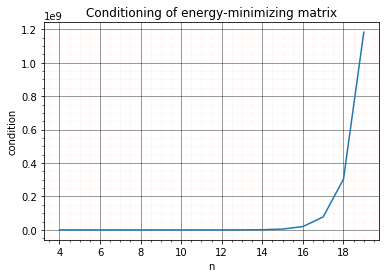

In [55]:
import matplotlib.pyplot as plt

ns = range(4, 20)
m1 = [np.linalg.cond(construct_energy_min_matrix(n, 1)) for n in ns]
plt.plot(ns, m1)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.minorticks_on()
plt.xlabel('n')
plt.ylabel('condition')
plt.title('Conditioning of energy-minimizing matrix')
plt.show()


This is clearly poorly conditioned. To investigate a little further, we'll make a semilogy plot of the data for $m=1,2,3$

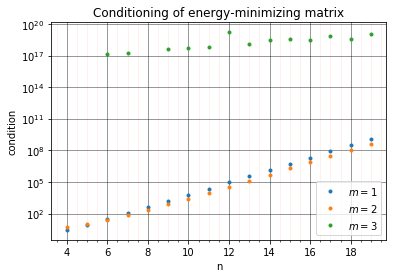

In [72]:
m2 = [np.linalg.cond(construct_energy_min_matrix(n, 2)) for n in ns]
m3 = [np.linalg.cond(construct_energy_min_matrix(n, 3)) for n in ns]
plt.semilogy(ns, m1, '.')
plt.semilogy(ns, m2, '.')
plt.semilogy(ns, m3, '.')
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.075)
plt.minorticks_on()
plt.xlabel('n')
plt.ylabel('condition')
plt.title('Conditioning of energy-minimizing matrix')
plt.legend(['$m=1$', '$m=2$', '$m=3$'], loc='lower right')
plt.show()